In [104]:
import pandas as pd
from datetime import datetime

In [105]:
%matplotlib inline
#画图

In [106]:
df1=pd.read_csv('tel01.xls',skiprows=0,nrows=720,delim_whitespace=True, header=None,names=['date', 'time','temp'])
#扫描，从720开始往后4560个，分成三列，列名

In [107]:
print(df1)

          date   time   temp
0    9/13/2018   0:05  36.59
1    9/13/2018   0:11  36.35
2    9/13/2018   0:17  35.87
3    9/13/2018   0:23  36.85
4    9/13/2018   0:29  37.08
..         ...    ...    ...
715  9/15/2018  23:35  37.01
716  9/15/2018  23:41  36.63
717  9/15/2018  23:47  36.74
718  9/15/2018  23:53  36.96
719  9/15/2018  23:59  36.86

[720 rows x 3 columns]


In [108]:
type(df1["time"][0])

str

In [109]:
df1.loc[df1["time"] == "9:35"]

,date,time,temp
95,9/13/2018,9:35,37.15
335,9/14/2018,9:35,36.12
575,9/15/2018,9:35,35.98


In [110]:
df1.loc[df1["temp"] == 0]
#看看有没有空数

,date,time,temp


In [111]:
dd=df1.groupby("time")["temp"].mean()
#用groupby分出time bin，去对应temp的平均值

In [112]:
dd.index = pd.to_datetime(dd.index).time
#把dd改成time

In [113]:
print(dd)

00:05:00    37.093333
00:11:00    36.876667
00:17:00    36.766667
00:23:00    36.916667
00:29:00    36.973333
              ...    
09:35:00    36.416667
09:41:00    36.263333
09:47:00    36.263333
09:53:00    36.266667
09:59:00    36.270000
Name: temp, Length: 240, dtype: float64


In [114]:
dd=dd.sort_index(axis = 0) 
#按顺序放

In [115]:
dd.columns=["time","temp"]

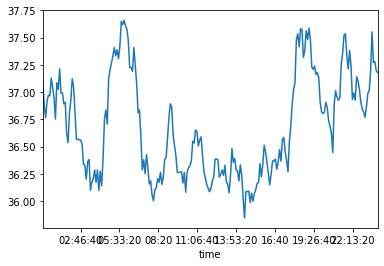

In [116]:
dd.plot(x='time',y='temp')

In [117]:
dd.to_csv("tel.csv")

/Users/rosalie/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [118]:
index = dd.index.get_loc(datetime.strptime("06:05:00",'%H:%M:%S'))
before = dd.iloc[:index]
after = dd.iloc[index:]
out = pd.concat([after,before])

KeyError: datetime.datetime(1900, 1, 1, 6, 5)